In [1]:
import sys
sys.path.append('../')
import os
from smodels.theory.exceptions import SModelSTheoryError as SModelSError
from smodels.tools.smodelsLogging import logger
from smodels.experiment.databaseObj import Database
from smodels.experiment.txnameObj import TxName,TxNameData
from smodels.experiment.infoObj import Info
from smodels.experiment.defaultFinalStates import finalStates
from smodels.theory.auxiliaryFunctions import bracketToProcessStr, elementsInStr
from smodels.theory.element import Element
from smodels.theory.tree import InclusiveParticleNode
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.tools.physicsUnits import fb, GeV
# logger.setLevel('DEBUG')

In [2]:
dbList = []
for dbdir in ['../test/database','../test/database_extra','../test/database_simple']:
    db = Database(os.path.abspath(dbdir))
    print(db)
    dbList.append(db)

Database version: unittest220
------------------------------
15 experimental results: 8 CMS, 7 ATLAS, 7 @ 8 TeV, 8 @ 13 TeV
124 datasets, 521 txnames.

Database version: unittest220extra
-----------------------------------
7 experimental results: 3 CMS, 4 ATLAS, 2 @ 8 TeV, 5 @ 13 TeV
86 datasets, 141 txnames.

Database version: unittest200b-beta
------------------------------------
2 experimental results: 0 CMS, 2 ATLAS, 0 @ 8 TeV, 2 @ 13 TeV
2 datasets, 2 txnames.



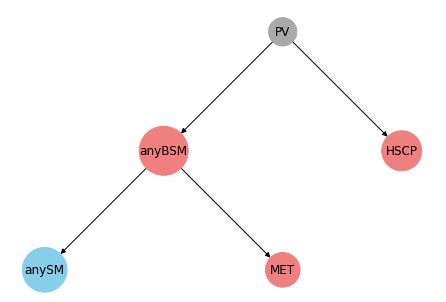

1101101000


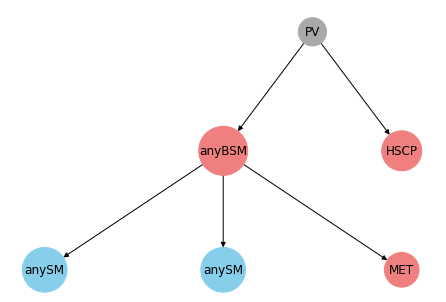

110110101000


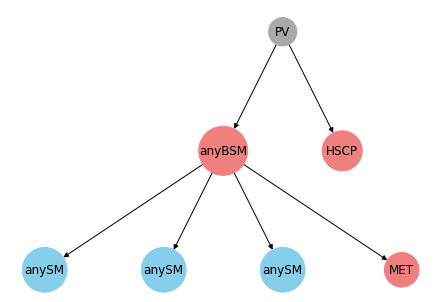

11011010101000


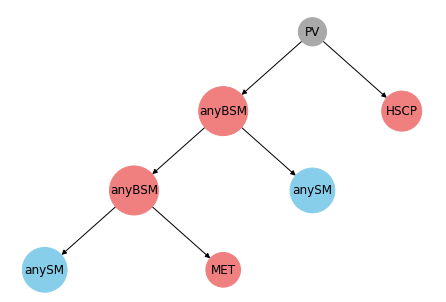

11011011010000


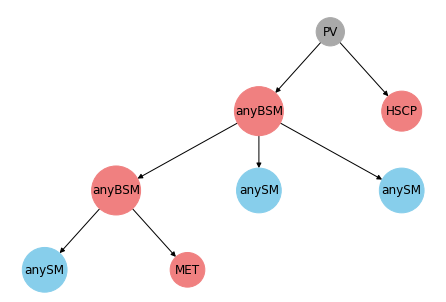

1101101011010000


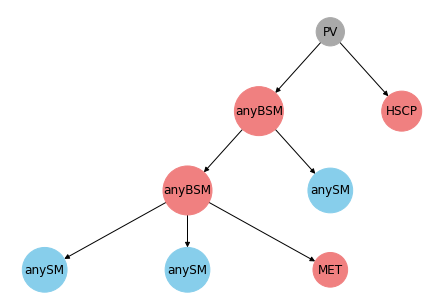

1101101101010000


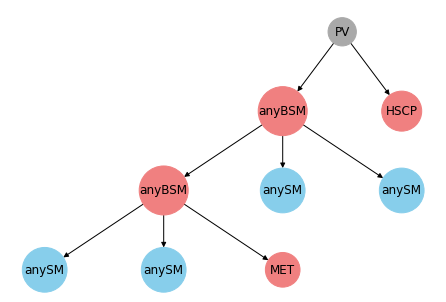

110110101101010000


In [5]:
db = dbList[0]
for exp in sorted(db.getExpResults(), key = lambda exp: exp.globalInfo.id):
#     print(exp.globalInfo.id,len(exp.getTxNames()))
    if 'EXO-16' in str(exp):
        for tx in exp.getTxNames():
#             print(tx)
            if 'M2' in str(tx):
                for el in tx._topologyDict.getElements():
                    el.drawTree()
                    print(el.getCanonName())
                break
        else:
            break

In [29]:
elA = '(PV > gluino(1),sta_1), (gluino(1) > u,u~,N2(3)), (N2(3) > W-,sta_1~(4)), (sta_1~(4) > W+,N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
el = Element(elA,model=model)

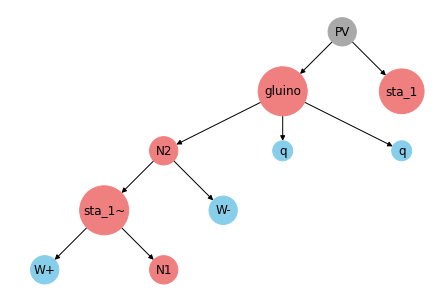

[PV, gluino, N2, sta_1~, W+, W-, q, q, N1, sta_1]
[(PV, gluino), (PV, sta_1), (gluino, N2), (gluino, q), (gluino, q), (N2, sta_1~), (N2, W-), (sta_1~, W+), (sta_1~, N1)]


In [30]:
el.drawTree()
print(el.tree.nodes)
print(el.tree.edges)

In [31]:
tx.hasElementAs(el)

False

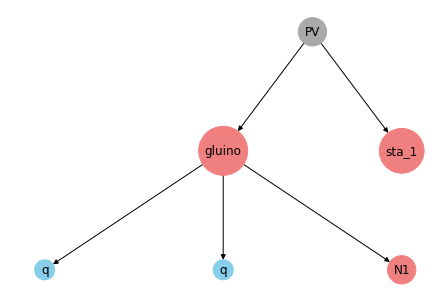

In [32]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
el = Element(elA,model=model)
el.drawTree()

In [33]:
matchedEl = tx.hasElementAs(el)

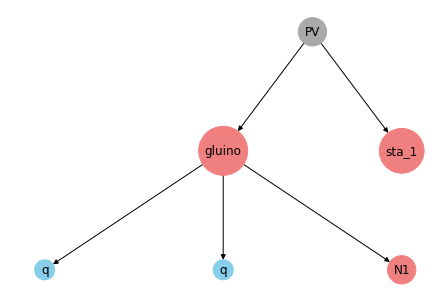

[PV, gluino, q, q, N1, sta_1]
[(PV, gluino), (PV, sta_1), (gluino, q), (gluino, q), (gluino, N1)]


In [34]:
matchedEl.drawTree()
print(matchedEl.tree.nodes)
print(matchedEl.tree.edges)

In [35]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > Z, N1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
el = Element(elA,model=model)

In [36]:
tx.hasElementAs(el)

(PV > gluino(1),sta_1), (gluino(1) > N2(2),q,q), (N2(2) > Z,N1)

In [37]:
elA = '(PV > sta_1,gluino(1)), (gluino(1) > u,u~,N2(2)), (N2(2) > W-, sta_1)'
slhafile="../inputFiles/slha/longLived.slha"
model = Model(BSMList,SMList)
model.updateParticles(inputFile=slhafile,promptWidth = 1e-12*GeV)
el = Element(elA,model=model)

In [38]:
tx.hasElementAs(el)

False

In [ ]:
db = Database(os.path.expanduser('~/smodels-database'))

In [3]:
print(db)

Database version: 2.2.0
------------------------
201 experimental results: 87 CMS, 114 ATLAS, 84 @ 8 TeV, 117 @ 13 TeV
1139 datasets, 7001 txnames.



In [7]:
expList = db.getExpResults()
print('Results with inclusive nodes:')
for exp in expList:
    for tx in exp.getTxNames():
        for el in tx._topologyList.getElements():
            if any( isinstance(n,InclusiveParticleNode) for n in el.tree.nodes):
                print(exp,tx)

Results with inclusive nodes:


In [ ]:
elStr = "45.35*([[['jet','jet'],['l+','nu']],[['jet','jet'],['l+','nu']]]+[[['jet','jet'],['l-','nu']],[['jet','jet'],['l-','nu'']]])"
els = elementsInStr(elStr)
for el in els:
    print(el)
    print(bracketToProcessStr(el))

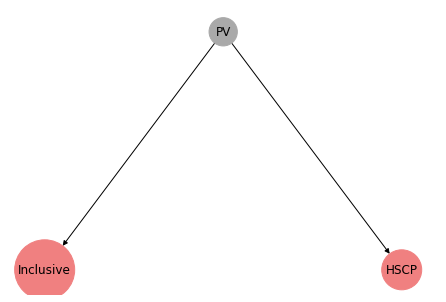

In [2]:
el = Element("[[*],[]]",finalState=['MET','HSCP'])
el.drawTree()

In [17]:
el = elementsInStr("[[*],[]]")[0]
bracketToProcessStr(el)

'(PV > InclusiveNode,MET)'